# Predicting Time Series Data
> If you want to predict patterns from data over time, there are special considerations to take in how you choose and construct your model. This chapter covers how to gain insights into the data before fitting your model, as well as best-practices in using predictive modeling for time series data. This is the Summary of lecture "Machine Learning for Time Series Data in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-Series Analysis, Machine Learning]
- image: images/price_percentile.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Predicting data over time
- Correlation and regression
    - Regression is similar to calculating correlation, with some key differences
        - Regression: A process that results in a formal model of the data
        - Correlation: A statistic that describes the data. Less information than regression model
- Correlation between variables often changes over time
    - Time series often have patterns that change over time
    - Two timeseries that seem correlated at one moment may not remain so over time.
- Scoring regression models
    - Two most common methods:
        - Correlation ($r$)
        - Coefficient of Determination ($R^2$)
            - The value of $R^2$ is bounded on the top by 1, and can be infinitely low
            - Values closer to 1 mean the model does a better jot of predicting outputs \
       $1 - \frac{\text{error}(model)}{\text{variance}(testdata)}$

In [2]:
prices = pd.read_csv('./dataset/tsa_prices.csv', index_col='date', parse_dates=True)
prices.head()

,EBAY,YHOO
date,,
2010-01-04,23.900000,17.100000
2010-01-05,23.650000,17.230000
2010-01-06,23.500000,17.170000
2010-01-07,23.229998,16.700001
2010-01-08,23.509999,16.700001


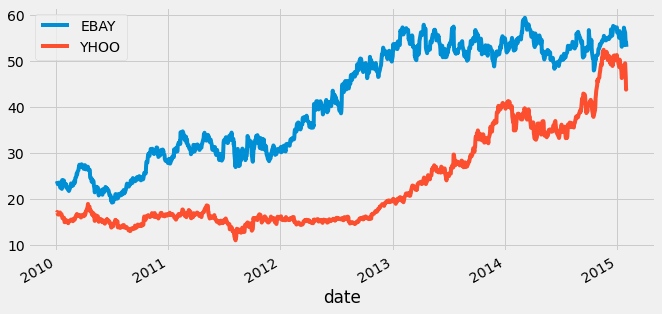

In [3]:
prices.plot();

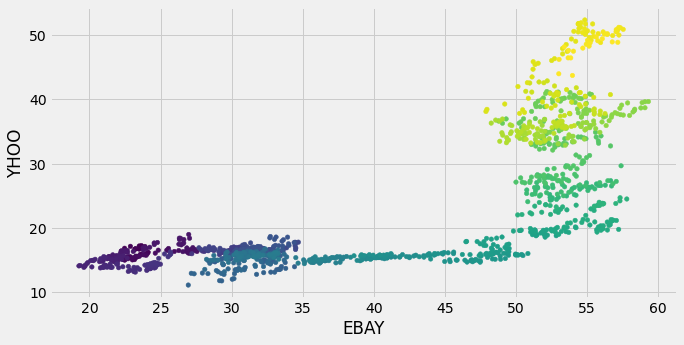

In [4]:
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, cmap=plt.cm.viridis, colorbar=False);

In [5]:
all_prices = pd.read_csv('./dataset/all_prices.csv', index_col=0, parse_dates=True)
all_prices.head()

,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,16.969999,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.740000,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,16.969999,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,16.920000,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]

scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                   shuffle=False, random_state=1)
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-0.3380697256228937


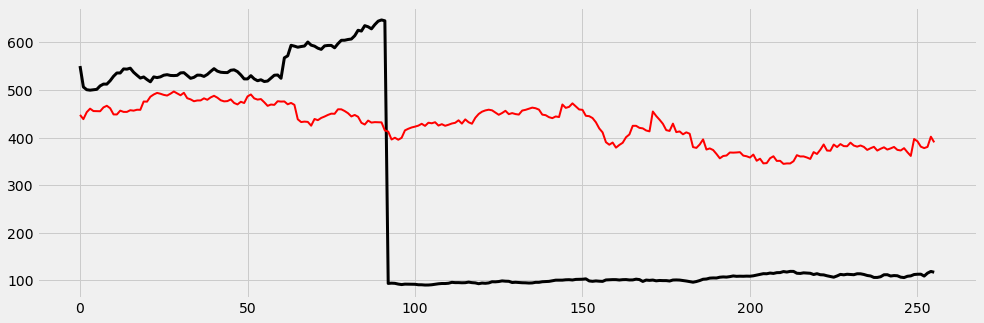

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(len(y_test)), y_test, color='k', lw=3);
ax.plot(range(len(predictions)), predictions, color='r', lw=2);

In [9]:
prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods=5, closed='right')
features_to_calculate = [np.min, np.max, np.mean, np.std]
features = prices_perc_rolling.aggregate(features_to_calculate)

ax = features.loc[:"2011-01"].plot();
prices_perc['EBAY'].loc[:"2011-01"].plot(ax=ax, color='k', alpha=0.2, lw=3);
ax.legend(loc=(1.01, 0.6));

NameError: name 'prices_perc' is not defined

In [ ]:
prices.plot.scatter('EBAY', 'YHOO');

In [ ]:
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis);
ax.legend(percentiles, loc=(1.01, 0.5));
#plt.savefig('../images/price_percentile.png')

In [ ]:
def replace_outliers(series):
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)    
    series[this_mask] = np.nanmedian(series)
    return series

prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot();

In [ ]:
def percent_change(series):
    previous_values = series[:-1]
    last_value = series[-1]
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot();

In [ ]:
features_percentiles.head(50)

In [ ]:
features

### Percentiles and partial functions
In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same ```percentile()``` function in numpy.

### Using "date" information
It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In [ ]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
prices_perc['week_of_year'] = prices_perc.index.weekofyear
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

## Advanced time series prediction
- Data is messy
    - Real-world data is often messy
    - The two most common problems are missing data and outliers
    - This often happens because of human error, machine error malfunction, database failure, etc..
    - Visualizing your raw data makes it easier to spot these problems
- Interpolation: using time to fill in missing data
    - A common way to deal with missing data is to interpolate missing values
    - With timeseries data, you can use time to assist in interpolation.
    - In this case, interpolation means using the known values on either side of a gap in the data to make assumptions about what's missing
- Using a rolling window to transform data
    - Another common use of rolling windows is to transform the data
- Finding outliers in your data
    - Outliers are datapoints that are significantly statistically different from the dataset.
    - They can have negative effects on the predictive power of your model, biasing it away from its "true" value
    - One solution is to remove or replace outliers with a more representative value
> Note: Be very careful about doing this - often it is difficult to determine what is a legitimately extreme value vs an abberation.

### Visualizing predicted values
When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables ```X``` and ```y```) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

### Fitting a simple regression model
Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo. Each of these is stored as a column in the all_prices DataFrame. Below is a mapping from company name to column name:
```
ebay: "EBAY"
nvidia: "NVDA"
yahoo: "YHOO"
apple: "AAPL"
```
We'll use these columns to define the input/output arrays in our model.